# Pump it Up: Data Mining the Water Table

## Wenxuan Zhu & Li Hong

## 1. Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

values_df = pd.read_csv('Training_set_values.csv')
labels_df = pd.read_csv('Training_set_labels.csv')
test_df = pd.read_csv('Test_set_values.csv')

df= pd.merge(values_df, labels_df, on = 'id' )
df_c = pd.merge(values_df, labels_df, on = 'id' )
test_df_c = pd.read_csv('Test_set_values.csv')

df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## 2. Prepare the data

In [2]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

## 3. Data analysis

### 3.1 General information about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

### 3.2 Feature types of the dataset

In [4]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']
print ('Categorical features: ',categorical_columns)
print ('Numerical features: ',numerical_columns)

Categorical features:  ['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']
Numerical features:  ['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year']


### 3.3 Check for nulls

In [5]:
values_df.apply(lambda x: sum(x.isnull()))

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

### 3.4 Distribution of Water Pump Status

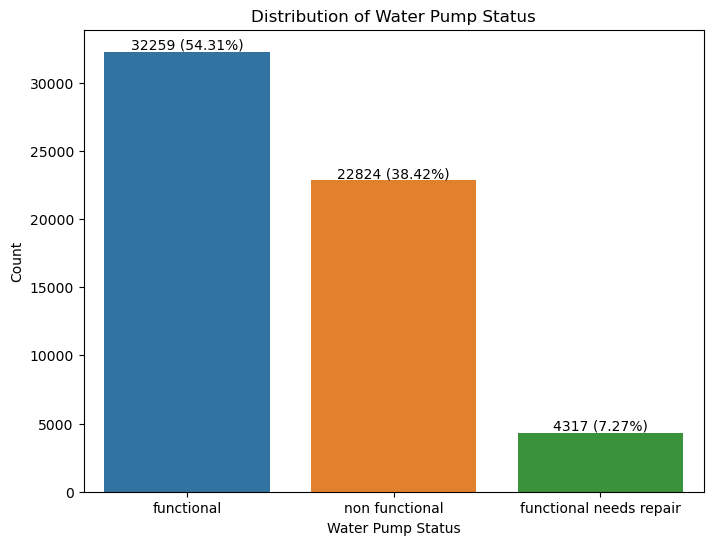

In [6]:
status_counts = df['status_group'].value_counts()
status_percentages = (status_counts / len(df)) * 100

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='status_group')
plt.xlabel('Water Pump Status')
plt.ylabel('Count')
plt.title('Distribution of Water Pump Status')

for i, p in enumerate(ax.patches):
    count = status_counts[i]
    percentage = status_percentages[i]
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, f"{count} ({percentage:.2f}%)", ha='center', va='bottom')

plt.show()

### 3.5 Correlation heatmap

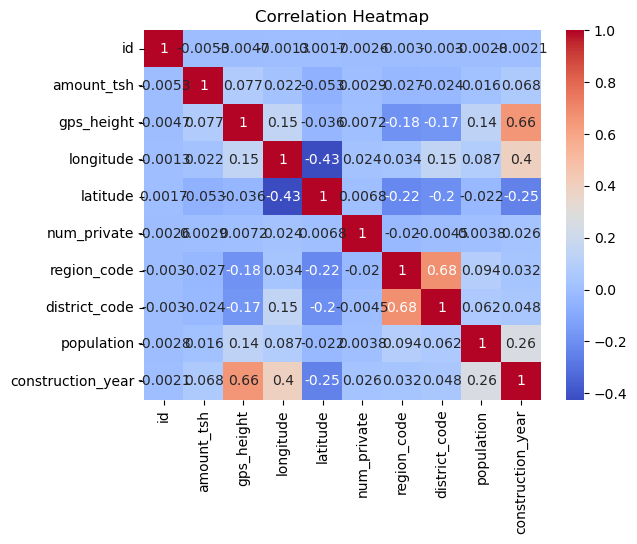

In [7]:
# plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 4. Data pre-processing and Data analysis

### 4.1 Use mode to fill null in train set and test set

In [8]:
for col in df.columns[df.isna().sum() > 0]:
    mode = df[col].mode()[0]
    df[col].fillna(value = mode, inplace = True)
    
test_df = pd.read_csv('Test_set_values.csv')

for col in test_df.columns[test_df.isna().sum() > 0]:
    mode = test_df[col].mode()[0]
    test_df[col].fillna(value = mode, inplace = True)     

In [9]:
df.apply(lambda x: sum(x.isnull()))

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

### 4.2 Visual analysis for question1 

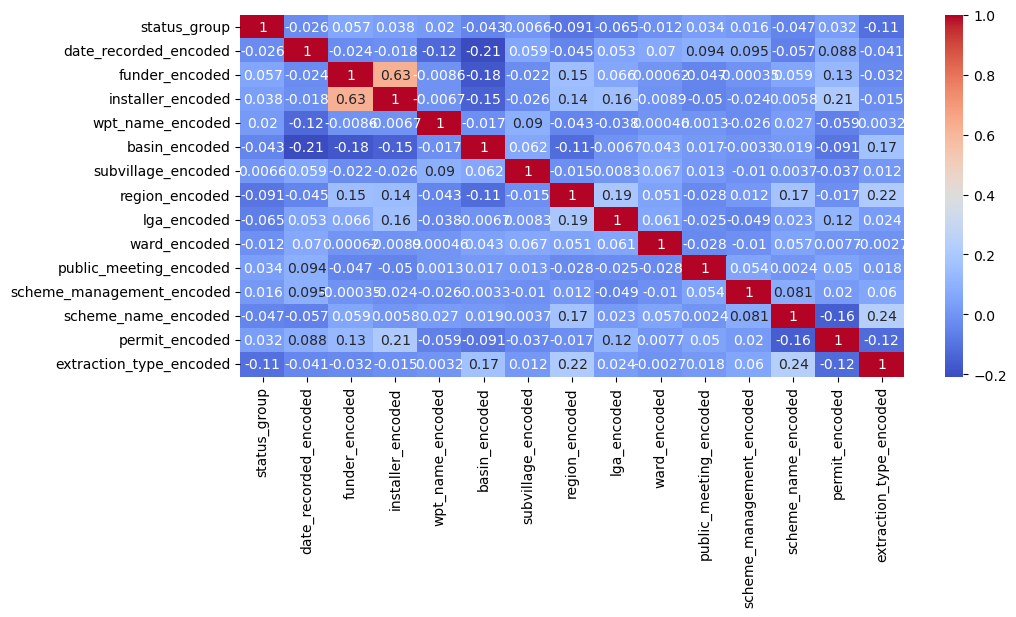

In [10]:
q1_drop = ['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'recorded_by', 'construction_year', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']
df_q1 = df_c.drop(columns = q1_drop)
df_q1['status_group'] = df_q1['status_group'].map({'functional': 2, 'functional needs repair': 1, 'non functional': 0})

from sklearn.preprocessing import LabelEncoder

replace = ['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'scheme_management', 'scheme_name', 'permit', 'extraction_type'] 

encoder = LabelEncoder()

for x in replace:
    # Fit the encoder on the combined set of unique values in the training set and the test set
    unique_values = pd.concat([df_q1[x], test_df_c[x]]).unique()
    encoder.fit(unique_values)
    
    # Transform both the training set and the test set
    df_q1[x + '_encoded'] = encoder.transform(df_q1[x])
    test_df_c[x + '_encoded'] = encoder.transform(test_df_c[x])
    
    # Drop the original feature from the training set and the test set
    df_q1.drop(columns=x, inplace=True)
    test_df_c.drop(columns=x, inplace=True)
    
correlation_matrix = df_q1.corr()
plt.figure(figsize=(10.7, 4.7)) 
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm") 
plt.show()

### 4.3 Visual analysis for question2

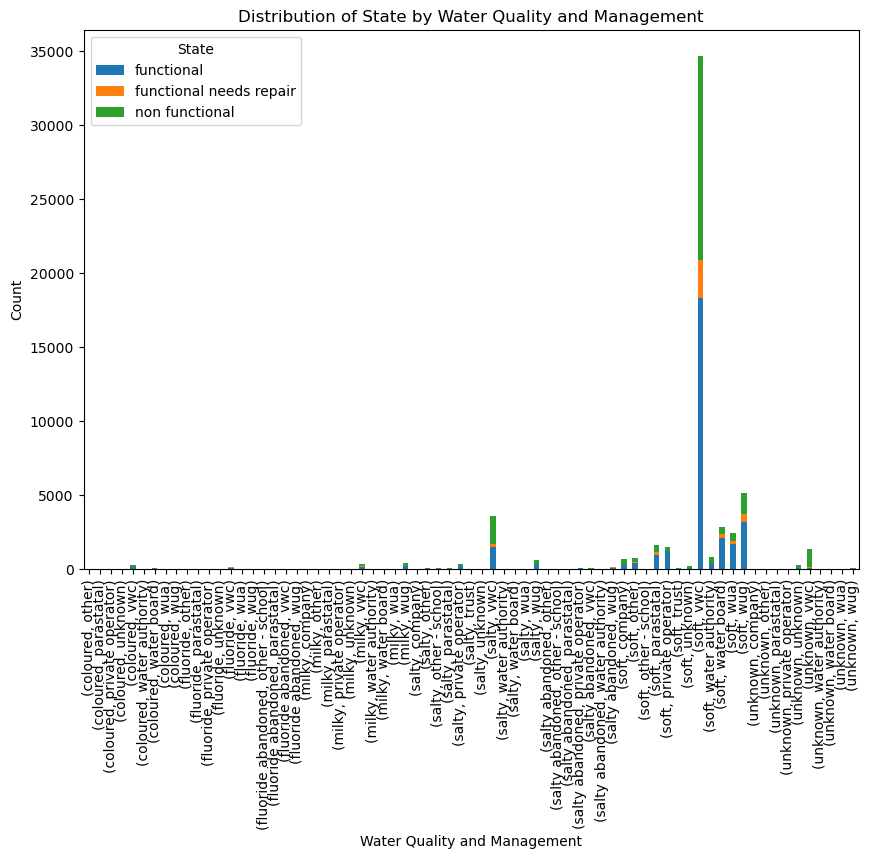

In [11]:
grouped = df.groupby(['water_quality', 'management', 'status_group']).size().unstack()

grouped.plot(kind='bar', stacked=True, figsize=(10,7))

plt.xlabel('Water Quality and Management')
plt.ylabel('Count')
plt.title('Distribution of State by Water Quality and Management')
plt.legend(title='State')

plt.show()

### 4.4 Feature engineering on 'fund' features: reducing the number of classes and visualizing

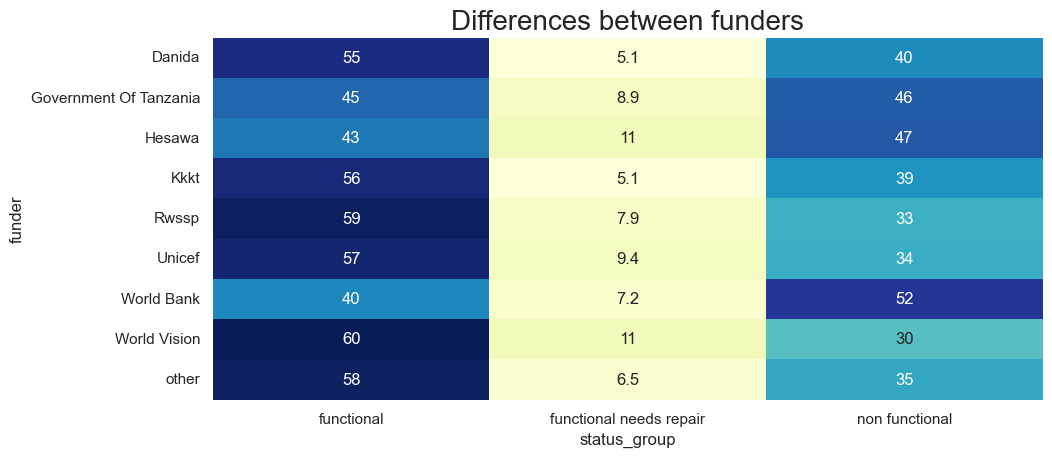

In [12]:
funder_counts = df.funder.value_counts()
considered_funders = [funder_counts.index[index[0]] for index in
 list(filter(lambda s: s[1] > 1000, [(i, funder_counts[i]) for i in range(len(funder_counts))]))]

def reduce_funder(x):
  if x.funder in considered_funders:
    return x.funder
  else:
    return 'other'
    
df.funder = df.apply(lambda x: reduce_funder(x), axis=1)
test_df.funder = test_df.apply(lambda x: reduce_funder(x), axis=1)

df.status_group.value_counts()

# To check differences between the different funders.
sns.set(rc={'figure.figsize':(10.7,4.7)})

ax = sns.heatmap(pd.crosstab(df.funder, df.status_group).apply(lambda r: round(((r/r.sum()) * 100), 3), axis=1),
            cmap="YlGnBu", annot=True, cbar=False)

plt.title('Differences between funders', fontsize = 20) 
plt.show()

In [13]:
df.funder.value_counts()

other                     35052
Government Of Tanzania    12719
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
Kkkt                       1287
World Vision               1246
Unicef                     1057
Name: funder, dtype: int64

### 4.5 Feature engineering on 'installer' features: reducing the number of classes and visualizing

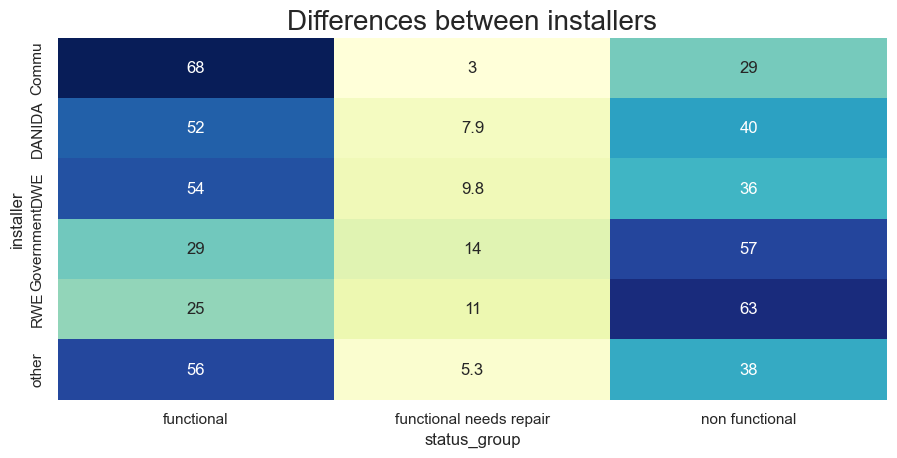

In [14]:
installer_counts = df.installer.value_counts()
considered_installers = [installer_counts.index[index[0]] for index in
 list(filter(lambda s: s[1] > 1000, [(i, installer_counts[i]) for i in range(len(installer_counts))]))]

def reduce_installer(x):
  if x.installer in considered_installers:
    return x.installer
  else:
    return 'other'
    
df.installer = df.apply(lambda x: reduce_installer(x), axis=1)
test_df.installer = test_df.apply(lambda x: reduce_installer(x), axis=1)

df.installer.value_counts()

sns.set(rc={'figure.figsize':(10.7,4.7)})

ax = sns.heatmap(pd.crosstab(df.installer, df.status_group).apply(lambda r: round(((r/r.sum()) * 100), 3), axis=1),
            cmap="YlGnBu", annot=True, cbar=False)

plt.title('Differences between installers', fontsize = 20) 

plt.show()

In [15]:
df.installer.value_counts()

other         33202
DWE           21057
Government     1825
RWE            1206
Commu          1060
DANIDA         1050
Name: installer, dtype: int64

### 4.6 Feature engineering on 'scheme_management' features: reducing the number of classes and visualizing

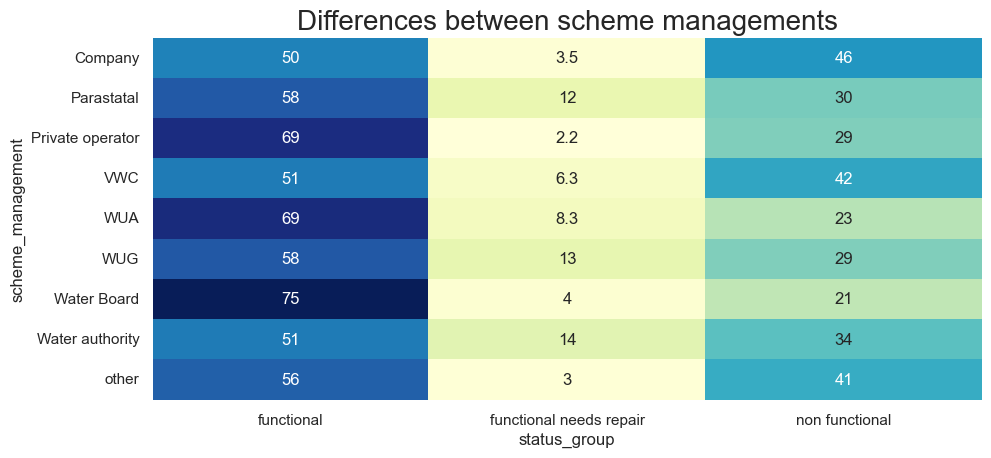

In [16]:
scheme_counts = df.scheme_management.value_counts()
considered_scheme_managements = [scheme_counts.index[index[0]] for index in
 list(filter(lambda s: s[1] > 1000, [(i, scheme_counts[i]) for i in range(len(scheme_counts))]))]

def reduce_scheme_management(x):
  if x.scheme_management in considered_scheme_managements:
    return x.scheme_management
  else:
    return 'other'
    
df.scheme_management = df.apply(lambda x: reduce_scheme_management(x), axis=1)
test_df.scheme_management = test_df.apply(lambda x: reduce_scheme_management(x), axis=1)

df.scheme_management.value_counts()

sns.set(rc={'figure.figsize':(10.7,4.7)})

ax = sns.heatmap(pd.crosstab(df.scheme_management, df.status_group).apply(lambda r: round(((r/r.sum()) * 100), 3), axis=1),
            cmap="YlGnBu", annot=True, cbar=False)

plt.title('Differences between scheme managements', fontsize = 20) 

plt.show()

In [17]:
df.scheme_management.value_counts()

VWC                 40670
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
other                 936
Name: scheme_management, dtype: int64

### 4.7 Train set: Delete some features and convert 'status_group' to 0, 1, 2

In [18]:
to_drop = ['funder', 'num_private', 'subvillage', 'region_code', 'recorded_by', 'source_type', 'waterpoint_type', 'scheme_name', 'payment_type', 'quantity_group']
df.drop(columns = to_drop, inplace = True)
#targets to 0,1,2
df['status_group'] = df['status_group'].map({'functional': 2, 'functional needs repair': 1, 'non functional': 0})

#date column
df['date_recorded'] = pd.to_datetime(df['date_recorded'])
df['year_recorded'] = df['date_recorded'].dt.year
df['month_recorded'] = df['date_recorded'].dt.month
df.drop(columns = 'date_recorded', inplace = True)

In [19]:
df.columns

Index(['id', 'amount_tsh', 'gps_height', 'installer', 'longitude', 'latitude',
       'wpt_name', 'basin', 'region', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'scheme_management', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'water_quality', 'quality_group', 'quantity', 'source', 'source_class',
       'waterpoint_type_group', 'status_group', 'year_recorded',
       'month_recorded'],
      dtype='object')

### 4.8 Test set: Same treatment as training set

In [20]:
to_drop = ['funder', 'num_private', 'subvillage', 'region_code', 'recorded_by', 'source_type', 'waterpoint_type', 'scheme_name', 'payment_type', 'quantity_group']
test_df.drop(columns = to_drop, inplace = True)

#date column
test_df['date_recorded'] = pd.to_datetime(test_df['date_recorded'])
test_df['year_recorded'] = test_df['date_recorded'].dt.year
test_df['month_recorded'] = test_df['date_recorded'].dt.month
test_df.drop(columns = 'date_recorded', inplace = True)


### 4.9 Data encoding for the remaining non-numeric features (such as categories, labels, etc.)

In [21]:
from sklearn.preprocessing import LabelEncoder

te_everything = ['wpt_name', 'basin', 'region', 'district_code', 'lga', 'ward', 'scheme_management','installer','source',
                'extraction_type', 'extraction_type_group', 'extraction_type_class','management', 'payment', 'water_quality', 
                'management_group', 'quality_group', 'quantity','source_class', 'waterpoint_type_group'] 

encoder = LabelEncoder()

for feature in te_everything:
    # Fit the encoder on the combined set of unique values in the training set and the test set
    unique_values = pd.concat([df[feature], test_df[feature]]).unique()
    encoder.fit(unique_values)
    
    # Transform both the training set and the test set
    df[feature + '_encoded'] = encoder.transform(df[feature])
    test_df[feature + '_encoded'] = encoder.transform(test_df[feature])
    
    # Drop the original feature from the training set and the test set
    df.drop(columns=feature, inplace=True)
    test_df.drop(columns=feature, inplace=True)



In [22]:
df

,id,amount_tsh,gps_height,longitude,latitude,population,public_meeting,permit,construction_year,status_group,...,extraction_type_group_encoded,extraction_type_class_encoded,management_encoded,payment_encoded,water_quality_encoded,management_group_encoded,quality_group_encoded,quantity_encoded,source_class_encoded,waterpoint_type_group_encoded
0,69572,6000.0,1390,34.938093,-9.856322,109,True,False,1999,2,...,1,0,7,2,6,4,2,1,0,1
1,8776,0.0,1399,34.698766,-2.147466,280,True,True,2010,2,...,1,0,11,0,6,4,2,2,1,1
2,34310,25.0,686,37.460664,-3.821329,250,True,True,2009,2,...,1,0,7,4,6,4,2,1,1,1
3,67743,0.0,263,38.486161,-11.155298,58,True,True,1986,0,...,10,5,7,0,6,4,2,0,0,1
4,19728,0.0,0,31.130847,-1.825359,0,True,True,0,2,...,1,0,1,0,6,1,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,37.169807,-3.253847,125,True,True,1999,2,...,1,0,9,4,6,4,2,1,0,1
59396,27263,4700.0,1212,35.249991,-9.070629,56,True,True,1996,2,...,1,0,7,2,6,4,2,1,1,1
59397,37057,0.0,0,34.017087,-8.750434,0,True,False,0,2,...,11,1,7,3,1,4,1,1,0,3
59398,31282,0.0,0,35.861315,-6.378573,0,True,True,0,2,...,5,1,7,0,6,4,2,2,0,3


### 4.10 Data dimensionality reduction, choose PCA

For train set

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate the features from the target
features = df.drop('status_group', axis=1)
target = df['status_group']

# Normalize
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# PCA
pca = PCA(n_components=20)  
X_pca = pca.fit_transform(features_scaled)

In [24]:
column_names = range(1, 21)

pca_show = pd.DataFrame(X_pca, columns=column_names)

pca_show

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-2.248530,0.364313,-0.513760,-1.160734,0.389995,-1.173774,0.893205,0.850317,0.268377,-0.975970,0.638933,-0.843587,2.057015,1.862080,0.606766,-0.085791,0.365377,-0.477749,-0.715356,-0.017433
1,-2.185826,0.270701,2.278308,0.685330,-0.703407,2.508129,0.124704,-0.461203,2.384861,0.826479,0.641434,0.889290,-0.573634,0.900010,-1.152923,-0.942417,-1.805453,-0.578825,-0.082857,0.007418
2,-1.325088,1.728274,0.049237,0.933570,-0.191985,2.649586,-0.476101,-0.217013,-0.804726,0.079295,0.078273,0.009171,-0.369207,0.783427,-0.233071,0.705315,-0.122640,-0.615688,-0.700267,-1.256612
3,2.673594,3.542596,-0.778398,-2.509143,0.271701,1.213874,-0.426576,-0.726844,0.459932,-1.590909,-0.048629,-1.474421,-0.058248,2.452510,0.020815,-0.275171,-0.442692,0.188380,-0.199805,-0.558295
4,-0.888296,-1.003288,-3.656448,3.882854,0.828904,-0.006494,-1.030872,-0.215071,0.994057,1.381373,0.264039,0.523810,-0.753641,1.242179,0.047569,-0.331564,-0.874527,-0.593164,-0.416346,0.706457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,-2.123575,-0.058870,2.096122,-0.076389,0.311889,0.351381,-2.081261,-1.291312,-0.027686,-0.683992,-0.621004,-0.879329,0.514517,-0.653829,0.522771,-0.075505,0.161145,-0.050966,0.255188,0.151036
59396,-2.216839,0.836490,-1.409345,-0.825409,0.957132,1.005107,0.432222,-0.527496,-0.211023,-0.009840,1.079046,0.894273,1.238718,-0.216727,-0.321460,-0.102714,-0.564108,-0.362616,0.501125,-0.693467
59397,3.559840,-0.088879,-0.894560,-2.094250,0.921641,-0.204952,-0.635734,1.693018,0.101521,0.631416,0.361668,0.198022,1.104708,-0.837752,-1.868050,-2.013607,2.387204,0.351602,-2.592971,1.236259
59398,0.547272,-0.743640,-1.151487,-0.793078,1.469676,-1.139978,-1.037320,-0.561959,1.210913,0.674834,0.069112,0.096703,-0.581309,0.630454,0.654430,-0.479773,-0.446960,0.042618,-0.092643,-0.318668


For test set

In [25]:
# Normalize
scaler_t = StandardScaler()
test_df_scaled = scaler_t.fit_transform(test_df)

# PCA
pca_t = PCA(n_components=20)  
test_pca = pca_t.fit_transform(test_df_scaled)

In [26]:
test_pca.shape

(14850, 20)

In [27]:
train, test = df, test_pca

In [28]:
train['status_group'].value_counts()

2    32259
0    22824
1     4317
Name: status_group, dtype: int64

In [29]:
train.shape

(59400, 32)

### 4.11 Randomly select some features and targets for training and testing

In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler

Datasets without data dimensionality reduction

In [31]:
y = train['status_group']
X = train.drop(columns = 'status_group')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

Datasets with data dimensionality reduction

In [32]:
y_d = train['status_group']
X_d = X_pca
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_d, y_d, test_size=0.3, random_state = 42)

### 4.12 Data balance

Use RandomOverSampler to do the data balance(whole dataset and split) without PCA

In [33]:
# ros = RandomOverSampler(random_state=42)
# X_resampled, y_resampled = ros.fit_resample(X, y)
# print(y.value_counts())
# print(y_resampled.value_counts())

# ros = RandomOverSampler(random_state=42)
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
# print(y_train.value_counts())
# print(y_train_resampled.value_counts())
# print('RandomOverSampler')

Use RandomOverSampler to do the data balance(whole dataset and split) with PCA

In [34]:
# ros = RandomOverSampler(random_state=42)
# X_d_resampled, y_d_resampled = ros.fit_resample(X_d, y_d)
# print(y_d.value_counts())
# print(y_d_resampled.value_counts())

# ros = RandomOverSampler(random_state=42)
# X_d_train_resampled, y_d_train_resampled = ros.fit_resample(X_d_train, y_d_train)
# print(y_d_train.value_counts())
# print(y_d_train_resampled.value_counts())

Use SMOTE to do the data balance(whole dataset and split) without PCA

In [35]:
smote = SMOTE(sampling_strategy = 'auto', n_jobs = -1)
X_resampled, y_resampled = smote.fit_sample(X, y)
print(y.value_counts())
print(y_resampled.value_counts())

smote_train = SMOTE(sampling_strategy = 'auto', n_jobs = -1)
X_train_resampled, y_train_resampled = smote_train.fit_sample(X_train, y_train)
print(y_train.value_counts())
print(y_train_resampled.value_counts())

2    32259
0    22824
1     4317
Name: status_group, dtype: int64
2    32259
0    32259
1    32259
Name: status_group, dtype: int64
2    22535
0    16021
1     3024
Name: status_group, dtype: int64
0    22535
2    22535
1    22535
Name: status_group, dtype: int64


Use SMOTE to do the data balance(whole dataset and split) with PCA

In [36]:
smote = SMOTE(sampling_strategy = 'auto', n_jobs = -1)
X_d_resampled, y_d_resampled = smote.fit_sample(X_d, y_d)
print(y_d.value_counts())
print(y_d_resampled.value_counts())

smote_train = SMOTE(sampling_strategy = 'auto', n_jobs = -1)
X_d_train_resampled, y_d_train_resampled = smote_train.fit_sample(X_d_train, y_d_train)
print(y_d_train.value_counts())
print(y_d_train_resampled.value_counts())
print('SMOTE')

2    32259
0    22824
1     4317
Name: status_group, dtype: int64
2    32259
0    32259
1    32259
Name: status_group, dtype: int64
2    22535
0    16021
1     3024
Name: status_group, dtype: int64
0    22535
2    22535
1    22535
Name: status_group, dtype: int64
SMOTE


## 5. Data classification

### 5.1 XGBoost classifier is evaluated for performance with the above dataset.

In [37]:
clf_xg = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', 
                      num_class = 3, eval_metric = 'merror', eta = .1,
                      max_depth = 16, colsample_bytree = .4, n_jobs = -1)
xg_scores = cross_val_score(clf_xg, X_d_train_resampled, y_d_train_resampled, cv=5, scoring='accuracy')
print(xg_scores.mean(), '+/-', xg_scores.std())

0.8426891502107832 +/- 0.016631541781771893


### 5.2 DecisionTree classifier is evaluated for performance with the above dataset.

In [38]:
clf_dt = DecisionTreeClassifier(max_depth = 16)
dt_scores = cross_val_score(clf_dt, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print(dt_scores.mean(), '+/-', dt_scores.std())

0.7633459063678723 +/- 0.05196480163713977


### 5.3 XGBoost is then trained and predictions are made on multiple datasets. The corresponding confusion matrices are also plotted to visualize the predictions

In [39]:
clf_xg.fit(X_d_resampled, y_d_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False, eta=0.1,
              eval_metric='merror', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=16, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_class=3, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', ...)

In [40]:
preds_train_resampled = clf_xg.predict(X_d_train_resampled)
preds_train = clf_xg.predict(X_d_train)
preds_test = clf_xg.predict(X_d_test)

Accuracy Score:  0.9697063826640041


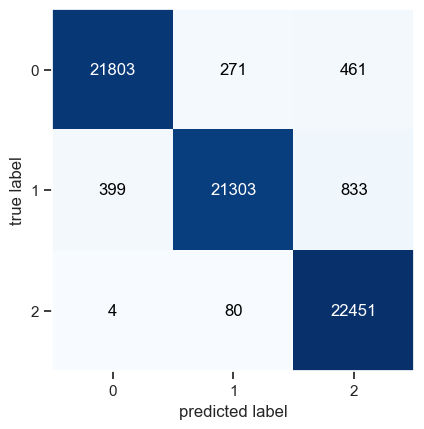

In [41]:
print("Accuracy Score: ", accuracy_score(y_d_train_resampled, preds_train_resampled))
cm = confusion_matrix(y_d_train_resampled, preds_train_resampled)
plot_confusion_matrix(cm)
plt.show()

Accuracy Score:  0.9970899470899471


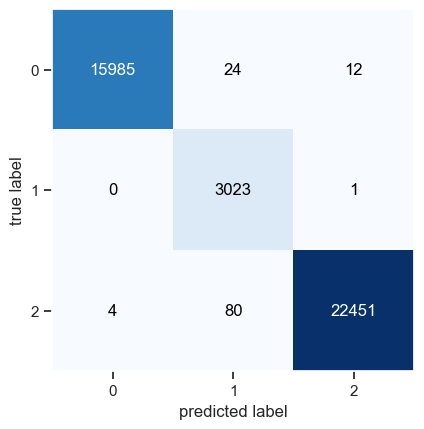

In [42]:
print("Accuracy Score: ", accuracy_score(y_d_train, preds_train))
cm = confusion_matrix(y_d_train, preds_train)
plot_confusion_matrix(cm)
plt.show()

Accuracy Score:  0.9970258136924803


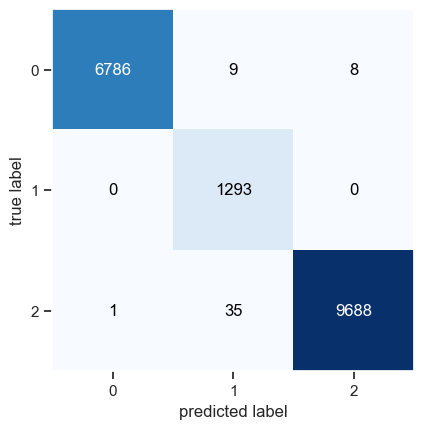

In [43]:
print("Accuracy Score: ", accuracy_score(y_d_test, preds_test))
cm = confusion_matrix(y_d_test, preds_test)
plot_confusion_matrix(cm)
plt.show()

### 5.4 DecisionTree is then trained and predictions are made on multiple datasets. The corresponding confusion matrices are also plotted to visualize the predictions

In [44]:
clf_dt.fit(X_resampled, y_resampled)

DecisionTreeClassifier(max_depth=16)

In [45]:
preds_train_resampled = clf_dt.predict(X_train_resampled)
preds_train = clf_dt.predict(X_train)
preds_test = clf_dt.predict(X_test)

Accuracy Score:  0.8471562754234154


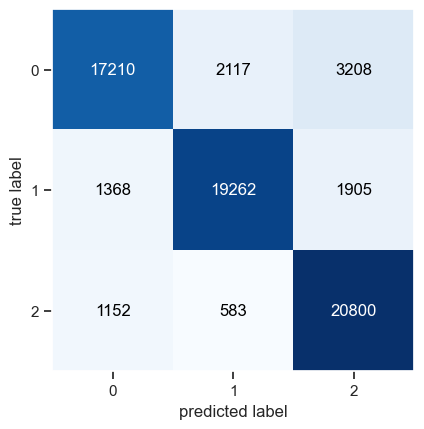

In [46]:
print("Accuracy Score: ", accuracy_score(y_train_resampled, preds_train_resampled))
cm = confusion_matrix(y_train_resampled, preds_train_resampled)
plot_confusion_matrix(cm)
plt.show()

Accuracy Score:  0.8514911014911015


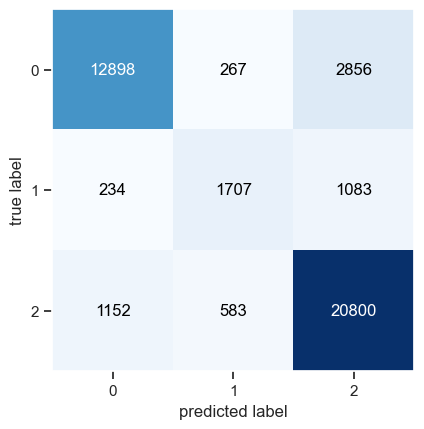

In [47]:
print("Accuracy Score: ", accuracy_score(y_train, preds_train))
cm = confusion_matrix(y_train, preds_train)
plot_confusion_matrix(cm)
plt.show()

Accuracy Score:  0.8517957351290685


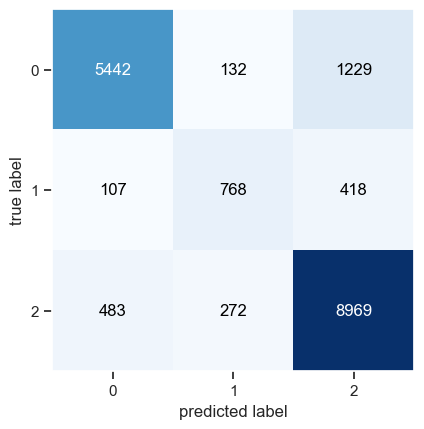

In [48]:
print("Accuracy Score: ", accuracy_score(y_test, preds_test))
cm = confusion_matrix(y_test, preds_test)
plot_confusion_matrix(cm)
plt.show()

## 6. Predictions

In [49]:
preds_main_test = clf_xg.predict(test)
submission_preds = pd.Series(preds_main_test)
submission_preds.value_counts()

2    8550
0    5979
1     321
dtype: int64

In [50]:
submission_preds_mapped = submission_preds.map({2: 'functional', 1: 'functional needs repair', 0: 'non functional'})
submission_preds_mapped.value_counts()

functional                 8550
non functional             5979
functional needs repair     321
dtype: int64

In [51]:
submit_df = pd.concat([test_df['id'], submission_preds_mapped], axis = 1)
submit_df.rename(columns = {0: 'status_group'}, inplace = True)
submit_df

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,functional
14846,18990,non functional
14847,28749,functional
14848,33492,functional
